# Region Based Analysis

This notebook shows the usage of _BlobMetrics_ class to do region based cell count

Package import

In [1]:
from tifffile import imread, imsave
import numpy as np
from src.BlobDetector import BlobDetector
from src.BlobMetrics import BlobMetrics
import json

The first step would be to give the raw brain image to the _BlobDetector_ package to get the centroids

In [2]:
raw_img_path = 'data/region/reg_raw.tiff'
detector = BlobDetector(raw_img_path, n_components=3)
centroids = detector.get_blob_centroids()

Next we want to do the region based analysis. For this two files are needed
* Registered atlast image of the brain which has the region numbers as its intensity value
* Ontology JSON which has the region number to name mapping

In [3]:
reg_img_path = 'data/region/reg_atlas.tiff'
ontology_json_path = 'data/region/ara_structure_ontology.json'

metrics = BlobMetrics([], centroids, 12)
id2name, region_stats = metrics.get_region_based_count(ontology_json_path, reg_img_path)
print(json.dumps(region_stats, indent=4, sort_keys=True))

Processing centroid [153.0, 160.0, 152.0]: 100%|██████████| 81/81 [00:00<00:00, 475.52it/s]


{
    "Basolateral amygdalar nucleus, anterior part": 3,
    "Caudoputamen": 23,
    "Endopiriform nucleus, dorsal part": 2,
    "Globus pallidus, external segment": 4,
    "Gustatory areas, layer 6a": 3,
    "Hypothalamus": 6,
    "Lateral hypothalamic area": 4,
    "Lateral posterior nucleus of the thalamus": 1,
    "Orbital area, lateral part, layer 6a": 1,
    "Pallidum": 1,
    "Paraventricular hypothalamic nucleus": 1,
    "Posterior hypothalamic nucleus": 3,
    "Primary somatosensory area, barrel field, layer 6a": 3,
    "Primary somatosensory area, nose, layer 6a": 1,
    "Primary somatosensory area, upper limb, layer 2/3": 3,
    "Primary somatosensory area, upper limb, layer 4": 1,
    "Striatum": 1,
    "Superior colliculus, motor related, intermediate gray layer": 3,
    "Supplemental somatosensory area, layer 5": 6,
    "Supplemental somatosensory area, layer 6a": 1,
    "Suprageniculate nucleus": 1,
    "Supramammillary nucleus": 2,
    "background": 4,
    "columns of t

The `region_stats` variable has the region name along with the number of cells in that region. Now let's visualize the results

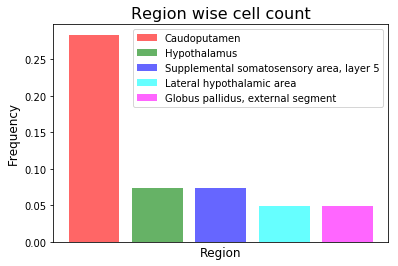

In [4]:
metrics.plot_region_based_count(region_stats)

## Analysis with region-based intensity sums

Average intensity of a region gives a good proxy for the number cells in that region. Now we are going to compare the region-based intensity sums with the cell detection results. From the below plot we see that the cell count and intensity sum correlate with each other.

Summing intensities of region 32767: 100%|██████████| 595/595 [00:41<00:00, 14.43it/s]


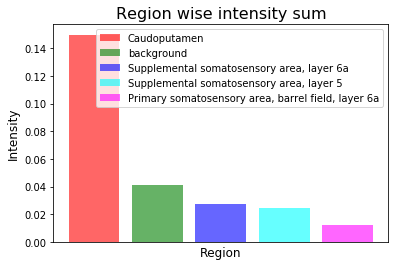

In [5]:
region_intensities = detector.get_avg_intensity_by_region(reg_atlas_path='data/region/reg_atlas.tiff')
metrics.plot_intensity_mapping(region_intensities, 'data/region/reg_atlas.tiff', id2name)